# Tiro Parabólico Ángulo de Mayor Alcance | Desde el caso más sencillo al más avanzado (con python) 

Aquí tienes el vídeo en el que se utiliza este código: https://youtu.be/J-LvnsCuLzU

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [132]:
def ejesAlcanceHorizontalEnFuncionDelAngulo(v0,y0,N=1000,g=9.8):
    # LEsta función se utiliza para calcular el alcance horizontal (distancia horizontal recorrida por el objeto lanzado) 
    # en función del ángulo de lanzamiento. Esto se hace utilizando una fórmula matemática que se proporciona en la función 
    # formulaAlcanceHorizontalEnFuncionDelAngulo. Los ejes X e Y se crean a partir de un rango de ángulos (en grados) y 
    # luego se utilizan para evaluar la fórmula y obtener una serie de valores de alcance horizontal.
    ejeX=np.linspace(0,90,N) 
    ejeY=np.array(formulaAlcanceHorizontalEnFuncionDelAngulo(v0,y0,ejeX[0]))
    for k in range(1,len(ejeX)):
        ejeY=np.append(ejeY,formulaAlcanceHorizontalEnFuncionDelAngulo(v0,y0,ejeX[k]))
    return ejeX,ejeY

def formulaAlcanceHorizontalEnFuncionDelAngulo(v0,y0,angulo,g=9.8):
    # Esta fórmula es la que se utiliza para calcular el alcance horizontal para un ángulo determinado. 
    # Esta función toma como entrada la velocidad inicial (v0), la altura inicial (y0) y el ángulo de 
    # lanzamiento (en grados), y devuelve el alcance horizontal correspondiente.
    anguloRads=angulo*np.pi/180
    x=v0*np.cos(anguloRads)*(v0*np.sin(anguloRads)+np.sqrt(v0**2*np.sin(anguloRads)**2+2*g*y0))/g
    return x

def encontrarAnguloMaximo(ejeX,ejeY):
    # Esta función se utiliza para encontrar el ángulo de lanzamiento que da lugar al alcance horizontal máximo. 
    # Esto se hace buscando el índice del elemento con el valor máximo en el eje Y y luego utilizando ese índice para obtener el 
    # valor correspondiente en el eje X
    indice=np.argmax(ejeY,axis=0)
    anguloMaximo=ejeX[indice]
    alcanceMaximo=ejeY[indice]
    return anguloMaximo,alcanceMaximo

def trayectoriaAnguloMaximoYVariantes(v0,y0,angulo,N=100,g=9.8,x0=0):
    # Esta función se utiliza para calcular el conjunto de coordenadas x e y del trio parabólico.
    # Para ello se utilizan las fórmulas del MRU para el eje x y MRUA para el eje y
    anguloRads=angulo*np.pi/180
    tMax=(v0*np.sin(anguloRads)+np.sqrt(v0**2*np.sin(anguloRads)**2+2*g*y0))/g
    t=np.linspace(0,tMax,N)
    x=np.array(x0+v0*np.cos(anguloRads)*t[0])
    y=np.array(y0+v0*np.sin(anguloRads)*t[0]-0.5*g*t[0]**2)
    for k in range(1,len(t)):
        x=np.append(x,v0*np.array(x0+np.cos(anguloRads)*t[k]))
        y=np.append(y,y0+v0*np.sin(anguloRads)*t[k]-0.5*g*t[k]**2)
    return x,y

def graficoAnguloYTrayectoria(ejeXAngulo,ejeYAlcance,x1,y1,x2,y2):
    # Esta función se utiliza para mostrar los dos gráficos del alcance máximo en función del ángulo
    # y de la trayectoria. En este último caso se dibujan dos líneas, una de las cuales corresponde al 
    # caso en el que el ángulo de lanzamiento son 45º
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(ejeXAngulo,ejeYAlcance)
    ax1.set_title("Alcance máximo (ángulo)")
    ax1.set_xlabel("Ángulo (º)")
    ax1.set_ylabel("Alacance máximo (m)")
    ax1.set_xlim(0,90)
    ax1.set_ylim(bottom=0)
    ax1.grid(True, linestyle='--', linewidth=0.5, color='grey')
    ax2.plot(x1,y1,color='green',label="{:.2f}º".format(np.max(ejeXAngulo[np.argmax(ejeYAlcance,axis=0)])))
    ax2.plot(x2,y2,color='red',label='45º')
    ax2.legend()
    ax2.set_title("Trayectoria: y(x)")
    ax2.set_xlabel("Posición en x (m)")
    ax2.set_ylabel("Posición en y (m)")
    ax2.legend
    ax2.set_xlim(left=0)
    ax2.set_ylim(bottom=0)
    ax2.grid(True, linestyle='--', linewidth=0.5, color='grey')
    fig.set_size_inches(24,6)

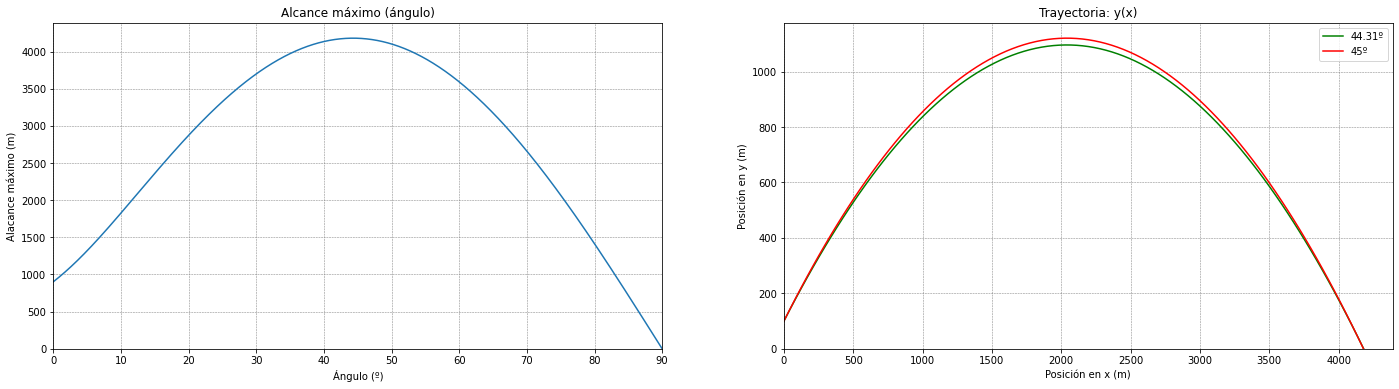

In [143]:
v0=200
y0=100
ejeXAngulo,ejeYAlcance=ejesAlcanceHorizontalEnFuncionDelAngulo(v0,y0,10000)
anguloOptimo,_=encontrarAnguloMaximo(ejeXAngulo,ejeYAlcance)
x1,y1=trayectoriaAnguloMaximoYVariantes(v0,y0,anguloOptimo)
x2,y2=trayectoriaAnguloMaximoYVariantes(v0,y0,45)
graficoAnguloYTrayectoria(ejeXAngulo,ejeYAlcance,x1,y1,x2,y2)